# Electricity Consumption Prediction (ECP)

## Prediction for a single user

In this notebook we're going to predict electricity consumption for a single user

In [91]:
# Import required packages

import glob
import random
import datetime
import os, fnmatch
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

import joblib

# from tensorflow.python.keras.models import Sequential
# from tensorflow.python.keras.layers import Dense
# from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor

%matplotlib inline

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

## 1.1. Peek at Our Data

There is no substitute for looking at the raw data.

Looking at the raw data can reveal insights that you cannot get any other way. It can also plant seeds that may later grow into ideas on how to better preprocess and handle the data for machine learning tasks.

We can review the first 5 rows of our data here.

In [92]:
# # Spliting data for unique users

# # Load the cleaned dataset
# # df = pd.read_csv("../dataset/dbBills_cleaned.csv")
# df = pd.read_csv("../dataset/dbBills_normalized.csv")

# unique_users = df['xSubscriptionId_fk'].unique()

# for unique_user in unique_users:
#     temp_df = df
#     user_data = temp_df.loc[temp_df['xSubscriptionId_fk'] == unique_user]
    
#     user_data.to_csv('../dataset/users_data/' + str(unique_user) + '.csv')

In [93]:
# Load the dataset
df = pd.read_csv("../dataset/users_data/153592.csv")

# Print top 5 reeocrds of dataset
df.head()

,Unnamed: 0,Unnamed: 0.1,xSubscriptionId_fk,xCycleCode,xFamilyNum,xFaze,xAmper,xCounterBuldingNo,xRegionName_Roustaei,xRegionName_Shahri,xUsageGroupName_Keshavarzi,xUsageGroupName_Khanegi,xUsageGroupName_Omoomi,xUsageGroupName_Sanati,xUsageGroupName_Sayer,xBakhshCode_1,xBakhshCode_2,xBakhshCode_4,xTimeControlCode_1,xTimeControlCode_2,xTimeControlCode_3,xTariffOldCode_1010,xTariffOldCode_1011,xTariffOldCode_1110,xTariffOldCode_1111,xTariffOldCode_1990,xTariffOldCode_2110,xTariffOldCode_2210,xTariffOldCode_2310,xTariffOldCode_2410,xTariffOldCode_2510,xTariffOldCode_2610,xTariffOldCode_2710,xTariffOldCode_2990,xTariffOldCode_2992,xTariffOldCode_3110,xTariffOldCode_3210,xTariffOldCode_3310,xTariffOldCode_3410,xTariffOldCode_3520,xTariffOldCode_3540,xTariffOldCode_3740,xTariffOldCode_3991,xTariffOldCode_4410,xTariffOldCode_4610,xTariffOldCode_4990,xTariffOldCode_5110,xTariffOldCode_5990,days_difference,month,mediumDailyUsage,highDailyUsage,lowDailyUsage,xMeduimKw,xHighKw,xLowKw
0,1576788,1576788,153592,10,1,1,5,62694457,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,65,2,0.553846,1.169231,1.415385,36,76,92
1,1579165,1579165,153592,10,1,1,5,62694457,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,57,4,0.140351,1.263158,1.122807,8,72,64
2,1579166,1579166,153592,10,1,1,5,62694457,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,60,6,1.450000,1.483333,1.400000,87,89,84
3,1579167,1579167,153592,10,1,1,5,62694457,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,56,8,1.464286,1.232143,1.214286,82,69,68
4,1579168,1579168,153592,10,1,1,5,62694457,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,65,10,1.553846,1.215385,1.353846,101,79,88


We can see that the first column lists the row number, which is handy for referencing a specific observation.

## 1.2. Dimensions of Our Data

We must have a very good handle on how much data we have, both in terms of rows and columns.

Too many rows and algorithms may take too long to train. Too few and perhaps you do not have enough data to train the algorithms.
Too many features and some algorithms can be distracted or suffer poor performance due to the curse of dimensionality.
You can review the shape and size of your dataset by printing the shape property.

In [94]:
# Dimensions of your data
print("Our data has dimention of {} Records and {} Columns or Features.".format(df.shape[0], df.shape[1]))

Our data has dimention of 42 Records and 56 Columns or Features.


## 1.3. Data Type For Each Attribute

The type of each attribute is important.

Strings may need to be converted to floating point values or integers to represent categorical or ordinal values.

We can get an idea of the types of attributes by peeking at the raw data, as above. We can also list the data types used by the DataFrame to characterize each attribute using the dtypes property.

In [95]:
# Data Types for Each Attribute
types = df.dtypes
types.head(56)

Unnamed: 0                      int64
Unnamed: 0.1                    int64
xSubscriptionId_fk              int64
xCycleCode                      int64
xFamilyNum                      int64
xFaze                           int64
xAmper                          int64
xCounterBuldingNo               int64
xRegionName_Roustaei            int64
xRegionName_Shahri              int64
xUsageGroupName_Keshavarzi      int64
xUsageGroupName_Khanegi         int64
xUsageGroupName_Omoomi          int64
xUsageGroupName_Sanati          int64
xUsageGroupName_Sayer           int64
xBakhshCode_1                   int64
xBakhshCode_2                   int64
xBakhshCode_4                   int64
xTimeControlCode_1              int64
xTimeControlCode_2              int64
xTimeControlCode_3              int64
xTariffOldCode_1010             int64
xTariffOldCode_1011             int64
xTariffOldCode_1110             int64
xTariffOldCode_1111             int64
xTariffOldCode_1990             int64
xTariffOldCo

We can see that most of the attribute types are objects (categorical string values).

## 1.4. Data Cleaning and Transformation

For apply more effective analysis on data we need to reshape our data. So we transform categorical data to numbers using one-hot encoding and fill **NaN** valuses with average amount as a way for data cleaning.

In [96]:
# Clean Dataset

df = df.drop(df.columns[[0, 1]], 1)

# Print top 5 reeocrds of dataset
df.head(62)

,xSubscriptionId_fk,xCycleCode,xFamilyNum,xFaze,xAmper,xCounterBuldingNo,xRegionName_Roustaei,xRegionName_Shahri,xUsageGroupName_Keshavarzi,xUsageGroupName_Khanegi,xUsageGroupName_Omoomi,xUsageGroupName_Sanati,xUsageGroupName_Sayer,xBakhshCode_1,xBakhshCode_2,xBakhshCode_4,xTimeControlCode_1,xTimeControlCode_2,xTimeControlCode_3,xTariffOldCode_1010,xTariffOldCode_1011,xTariffOldCode_1110,xTariffOldCode_1111,xTariffOldCode_1990,xTariffOldCode_2110,xTariffOldCode_2210,xTariffOldCode_2310,xTariffOldCode_2410,xTariffOldCode_2510,xTariffOldCode_2610,xTariffOldCode_2710,xTariffOldCode_2990,xTariffOldCode_2992,xTariffOldCode_3110,xTariffOldCode_3210,xTariffOldCode_3310,xTariffOldCode_3410,xTariffOldCode_3520,xTariffOldCode_3540,xTariffOldCode_3740,xTariffOldCode_3991,xTariffOldCode_4410,xTariffOldCode_4610,xTariffOldCode_4990,xTariffOldCode_5110,xTariffOldCode_5990,days_difference,month,mediumDailyUsage,highDailyUsage,lowDailyUsage,xMeduimKw,xHighKw,xLowKw
0,153592,10,1,1,5,62694457,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,65,2,0.553846,1.169231,1.415385,36,76,92
1,153592,10,1,1,5,62694457,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,57,4,0.140351,1.263158,1.122807,8,72,64
2,153592,10,1,1,5,62694457,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,60,6,1.450000,1.483333,1.400000,87,89,84
3,153592,10,1,1,5,62694457,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,56,8,1.464286,1.232143,1.214286,82,69,68
4,153592,10,1,1,5,62694457,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,65,10,1.553846,1.215385,1.353846,101,79,88
5,153592,10,1,1,5,62694457,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,57,12,4.315789,1.333333,0.947368,246,76,54
6,153592,10,1,1,5,62694457,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,49,1,0.653061,0.265306,0.428571,32,13,21
7,153592,10,1,1,5,62694457,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,187,3,1.085561,0.508021,0.721925,203,95,135
8,153592,10,1,1,5,62694457,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,452,4,1.676991,0.663717,1.088496,758,300,492
9,153592,10,1,1,5,62694457,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,186,7,1.026882,0.462366,0.661290,191,86,123


## 1.5. Descriptive Statistics

Descriptive statistics can give you great insight into the shape of each attribute.

Often you can create more summaries than you have time to review. The describe() function on the Pandas DataFrame lists 8 statistical properties of each attribute:

* **Count**
* **Mean**
* **Standard Devaition**
* **Minimum Value**
* **25th Percentile**
* **50th Percentile (Median)**
* **75th Percentile**
* **Maximum Value**

In [97]:
df.describe()

,xSubscriptionId_fk,xCycleCode,xFamilyNum,xFaze,xAmper,xCounterBuldingNo,xRegionName_Roustaei,xRegionName_Shahri,xUsageGroupName_Keshavarzi,xUsageGroupName_Khanegi,xUsageGroupName_Omoomi,xUsageGroupName_Sanati,xUsageGroupName_Sayer,xBakhshCode_1,xBakhshCode_2,xBakhshCode_4,xTimeControlCode_1,xTimeControlCode_2,xTimeControlCode_3,xTariffOldCode_1010,xTariffOldCode_1011,xTariffOldCode_1110,xTariffOldCode_1111,xTariffOldCode_1990,xTariffOldCode_2110,xTariffOldCode_2210,xTariffOldCode_2310,xTariffOldCode_2410,xTariffOldCode_2510,xTariffOldCode_2610,xTariffOldCode_2710,xTariffOldCode_2990,xTariffOldCode_2992,xTariffOldCode_3110,xTariffOldCode_3210,xTariffOldCode_3310,xTariffOldCode_3410,xTariffOldCode_3520,xTariffOldCode_3540,xTariffOldCode_3740,xTariffOldCode_3991,xTariffOldCode_4410,xTariffOldCode_4610,xTariffOldCode_4990,xTariffOldCode_5110,xTariffOldCode_5990,days_difference,month,mediumDailyUsage,highDailyUsage,lowDailyUsage,xMeduimKw,xHighKw,xLowKw
count,42.0,42.0,42.0,42.0,42.0,4.200000e+01,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.000000,42.0,42.000000,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.000000,42.0000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000
mean,153592.0,10.0,1.0,1.0,5.0,4.179630e+07,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.333333,0.0,0.666667,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,93.952381,6.0000,1.593139,0.533490,0.665986,140.142857,50.880952,70.023810
std,0.0,0.0,0.0,0.0,0.0,2.991270e+07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.477119,0.0,0.477119,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,76.785718,3.5269,1.045151,0.485118,0.532068,125.935441,56.221341,88.759332
min,153592.0,10.0,1.0,1.0,5.0,0.000000e+00,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.000000,1.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,153592.0,10.0,1.0,1.0,5.0,0.000000e+00,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,59.000000,3.0000,1.032066,0.000000,0.000000,80.250000,0.000000,0.000000
50%,153592.0,10.0,1.0,1.0,5.0,6.269446e+07,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.0,1.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,61.500000,6.0000,1.342178,0.493773,0.748240,97.500000,50.500000,64.500000
75%,153592.0,10.0,1.0,1.0,5.0,6.269446e+07,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.000000,0.0,1.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,97.250000,9.0000,1.657743,0.906780,1.120387,184.250000,78.250000,87.500000
max,153592.0,10.0,1.0,1.0,5.0,6.269446e+07,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.000000,0.0,1.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,452.000000,12.0000,5.032787,1.483333,1.457627,758.000000,300.000000,492.000000


We can see that we do get a lot of data. We will note some functio calls in the recipe to change the precision of the numbers and the preferred width of the output. This is to make it more readable for this example.

When describing our data this way, it is worth taking some time and reviewing observations from the results. This might include the presence of “NA” values for missing data or surprising distributions for attributes. We can see Box-Plot chart for 4 selected features as following. This charts will help us to detect outliers.

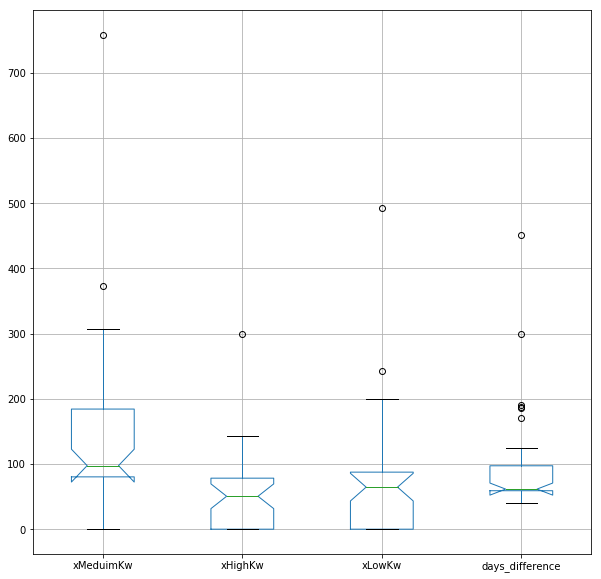

In [98]:
boxplot = df.boxplot(column=['xMeduimKw', 'xHighKw', 'xLowKw', 'days_difference'], 
                                   return_type='axes', 
                                   figsize=(10,10),
                                   notch = True
                                  )

### Interpreting the Box-Plot chart for weights

A box and whisker plot—also called a box plot—displays the five-number summary of a set of data. The five-number summary is the minimum, first quartile, median, third quartile, and maximum.

In a box plot, we draw a box from the first quartile to the third quartile. A vertical line goes through the box at the median. The whiskers go from each quartile to the minimum or maximum.

# 1.6. Classification

In this section we're going to try some regression algorithms to predict 'xMeduimKw' value.

In [99]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

features = ['days_difference', 'month']

X = df[features]
y = df["mediumDailyUsage"]

xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size = 0.1, random_state = 0)

print(xTest)
print("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")
print(yTest)

    days_difference  month
30               62      3
36               71     11
27               63     12
4                65     10
10              117      9
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
30    3.000000
36    3.098592
27    1.444444
4     1.553846
10    0.803419
Name: mediumDailyUsage, dtype: float64


## 1.6.1. SVR

In [100]:
from sklearn import svm

clf = svm.SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, gamma='auto', verbose=False)
clf.fit(xTrain, yTrain)

print(mean_squared_error(yTest, clf.predict(xTest)))

clf.predict(xTest)

1.3821796662043022


array([1.39435621, 1.0980056 , 1.30321344, 1.30321653, 1.30111431])

## 1.6.2. tree

In [101]:
from sklearn import tree
from sklearn.metrics import mean_squared_error

est = tree.DecisionTreeRegressor()
est.fit(xTrain, yTrain)  

print(mean_squared_error(yTest, est.predict(xTest)))

est.predict(xTest)

2.4585197098568354


array([1.45901639, 1.89189189, 4.31578947, 1.95081967, 1.04761905])

## 1.6.3. GradientBoostingRegressor

In [102]:
from sklearn.datasets import make_friedman1
from sklearn.ensemble import GradientBoostingRegressor

est = GradientBoostingRegressor(n_estimators=600, learning_rate=0.1,
                                max_depth=3, random_state=0, loss='ls').fit(xTrain, yTrain)

print(mean_squared_error(yTest, est.predict(xTest)))

est.predict(xTest)

1.93245220188238


array([1.95156542, 1.03248286, 3.49641908, 1.278549  , 0.89203272])

## 1.6.4. Neural Network

In [131]:
# #Variables
# x=X
# y=y
# y=np.reshape(y, (-1,1))
# scaler = MinMaxScaler()
# print(scaler.fit(x))
# print(scaler.fit(y))
# xscale=scaler.transform(x)
# yscale=scaler.transform(y)

In [132]:
# X_train, X_test, y_train, y_test = train_test_split(xscale, yscale)

In [133]:
# model = Sequential()
# model.add(Dense(12, input_dim=2, kernel_initializer='normal', activation='relu'))
# model.add(Dense(8, activation='relu'))
# model.add(Dense(1, activation='linear'))
# model.summary()

In [134]:
# model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])

In [135]:
# history = model.fit(X_train, y_train, epochs=150, batch_size=50,  verbose=0, validation_split=0.1)

In [136]:
# print(history.history.keys())
# # "Loss"
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('model loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train', 'validation'], loc='upper left')
# plt.show()

In [137]:
# Xnew = np.array([[63, 10]])
# ynew=model.predict(Xnew)
# print("X=%s, Predicted=%s" % (Xnew[0], ynew[0]))

# 2. Detect change in counter type and create model

In [110]:
from sklearn import svm

def create_model(user_df, label, code, user_id):
    features = ['days_difference', 'month']
    X = user_df[features]
    y = user_df[label]
    xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size = 0.1, random_state = 0)
    clf = svm.SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
        kernel='rbf', max_iter=-1, shrinking=True,
        tol=0.001, verbose=False, gamma='auto')
    clf.fit(xTrain, yTrain)
    joblib.dump(clf, '../dataset/users_data/' + str(user_id) + '-' + label + '-' + str(code) + '.pkl')

In [111]:
def counter_create_model(user_df, user_id):
    user_df = user_df[~user_df.isin([np.inf, -np.inf]).any(1)]
    if user_df['xTimeControlCode_1'].any():
        if len(user_df.index) > 33:
            create_model(user_df, 'mediumDailyUsage', 100, user_id)
        elif len(user_df.index) >= 12:
            create_model(user_df, 'mediumDailyUsage', 101, user_id)
    elif user_df['xTimeControlCode_2'].any:
        if len(user_df.index) > 33:
            create_model(user_df, 'mediumDailyUsage', 200, user_id)
            create_model(user_df, 'highDailyUsage', 210, user_id)
        elif len(user_df.index) >= 12:
            create_model(user_df, 'mediumDailyUsage', 201, user_id)
            create_model(user_df, 'highDailyUsage', 211, user_id)
    elif df['xTimeControlCode_3'].any:
        if len(df.index) > 33:
            create_model(user_df, 'mediumDailyUsage', 300, user_id)
            create_model(user_df, 'highDailyUsage', 310, user_id)
            create_model(user_df, 'lowDailyUsage', 320, user_id)
        elif len(user_df.index) >= 12:
            create_model(user_df, 'mediumDailyUsage', 301, user_id)
            create_model(user_df, 'highDailyUsage', 311, user_id)
            create_model(user_df, 'lowDailyUsage', 321, user_id)       

In [112]:
def counter_change_detection(user_df):
    user_id = user_df['xSubscriptionId_fk'][0]
    user_unique_couters = user_df['xCounterBuldingNo'].unique()
        
    # We have only one type of counter
    if len(user_unique_couters) == 1:
        counter_create_model(user_df, user_id)

    # We have more than one type of counter
    elif len(user_unique_couters) >= 1:
        if user_df['xTimeControlCode_3'].any():
            new_user_data = user_df.loc[user_df['xTimeControlCode_3'] == 1]
            counter_create_model(new_user_data, user_id)
        elif user_df['xTimeControlCode_2'].any():
            new_user_data = user_df.loc[user_df['xTimeControlCode_2'] == 1]
            counter_create_model(new_user_data, user_id)

In [113]:
counter_change_detection(df)

# 3. Load and test the model

In [114]:
def predict(user_id, days, month):
    """
    Get predictions for a particular user.
    """
    try:
        base_path = '../dataset/users_data/'
        models = glob.glob(base_path + str(user_id) + '*.pkl')
        
        if len(models) == 0:
            error_content = {
                "success": False,
                "message": "Hello! Error Happened.",
                "code": "MODEL_NOT_FOUND_ERROR",
                "properties": {
                    "code": 2000,
                    "message": ex.__str__(),
                },
            }
            return error_content

        code = models[0].split("-")[2].split(".")[0]
        first_digit_code = (int(str(code)[:1]))
        last_digit_code = (int(str(code)[-1:]))
        
        medium_predicted = 0
        high_predicted = 0
        low_predicted = 0

        message = None

        if first_digit_code == 1:
            if last_digit_code == 0:
                est = joblib.load(base_path + '{0}-mediumDailyUsage-100.pkl'.format(str(user_id)))
                if (days * est.predict([[days, month]])[0]) > 0:
                    medium_predicted = days * est.predict([[days, month]])[0]
                else:
                    medium_predicted = 0
            else:
                est = joblib.load(base_path + '{0}-mediumDailyUsage-101.pkl'.format(str(user_id)))
                if (days * est.predict([[days, month]])[0]) > 0:
                    medium_predicted = days * est.predict([[days, month]])[0]
                else:
                    medium_predicted = 0
                message = "   *Results may not be percise due to low amount of training data!"
        elif first_digit_code == 2:
            if last_digit_code == 0:
                est_medium = joblib.load(base_path + '{0}-mediumDailyUsage-200.pkl'.format(str(user_id)))
                if (days * est_medium.predict([[days, month]])[0]) > 0:
                    medium_predicted = days * est_medium.predict([[days, month]])[0]
                else:
                    medium_predicted = 0
                est_high = joblib.load(base_path + '{0}-highDailyUsage-210.pkl'.format(str(user_id)))
                if (days * est_high.predict([[days, month]])[0]) > 0 :
                    high_predicted = days * est_high.predict([[days, month]])[0]
                else:
                    high_predicted = 0
            else:
                est_medium = joblib.load(base_path + '{0}-mediumDailyUsage-201.pkl'.format(str(user_id)))
                if (days * est_medium.predict([[days, month]])[0]) > 0:
                    medium_predicted = days * est_medium.predict([[days, month]])[0]
                else: 
                    medium_predicted = 0
                est_high = joblib.load(base_path + '{0}-highDailyUsage-211.pkl'.format(str(user_id)))
                if (days * est_high.predict([[days, month]])[0]) > 0:
                    high_predicted = days * est_high.predict([[days, month]])[0]
                else:
                    high_predicted = 0
                message = "   *Results may not be percise due to low amount of training data!"
        elif first_digit_code == 3:
            if last_digit_code == 0:
                est_medium = joblib.load(base_path + '{0}-mediumDailyUsage-300.pkl'.format(str(user_id)))
                if (days * est_medium.predict([[days, month]])[0]) > 0:
                    medium_predicted = days * est_medium.predict([[days, month]])[0]
                else:
                    medium_predicted = 0
                est_high = joblib.load(base_path + '{0}-highDailyUsage-310.pkl'.format(str(user_id)))
                if (days * est_high.predict([[days, month]])[0]) > 0:
                    high_predicted = days * est_high.predict([[days, month]])[0]
                else:
                    high_predicted = 0
                est_low = joblib.load(base_path + '{0}-lowDailyUsage-320.pkl'.format(str(user_id)))
                low_predicted = days * est_low.predict([[days, month]])[0]

            else:
                est_medium = joblib.load(base_path + '{0}-mediumDailyUsage-301.pkl'.format(str(user_id)))
                if (days * est_medium.predict([[days, month]])[0]) > 0:
                    medium_predicted = days * est_medium.predict([[days, month]])[0]
                else:
                    medium_predicted = 0
                est_high = joblib.load(base_path + '{0}-highDailyUsage-311.pkl'.format(str(user_id)))
                if (days * est_high.predict([[days, month]])[0]) > 0:
                    high_predicted = days * est_high.predict([[days, month]])[0]
                else:
                    high_predicted = 0
                est_low = joblib.load(base_path + '{0}-lowDailyUsage-321.pkl'.format(str(user_id)))
                if (days * est_low.predict([[days, month]])[0]) > 0:
                    low_predicted = days * est_low.predict([[days, month]])[0]
                else:
                    low_predicted = 0
                message = "   *Results may not be percise due to low amount of training data!"
        return {
            "success": True, 
            "message": message, 
            "prediction": {
                "medium_predicted": round(medium_predicted, 2), 
                "high_predicted": round(high_predicted, 2), 
                "low_predicted": round(low_predicted, 2) }
        }

    except Exception as ex:
        error_content = {
            "success": False,
            "message": "Hello! Error Happened.",
            "code": "PREDICTION_ERROR",
            "properties": {
                "code": 1000,
                "message": ex.__str__(),
            },
        }
        return error_content

In [115]:
est = joblib.load('../dataset/users_data/153592-mediumDailyUsage-201.pkl')

In [116]:
predicted = est.predict([[56, 6]])
predicted = predicted[0]*56

expected = 10.178571 * 56

error = predicted - expected
error_percent = (error *100) / expected
error_percent

-88.97452334124112

In [117]:
sample = df.sample(20)
input_data = sample[features]

expected = sample['mediumDailyUsage']

predicted = est.predict(input_data)

print(mean_squared_error(expected, est.predict(input_data)))

errors = ((expected - predicted) * 100) / expected
errors.mean

1.8820311726115513


<bound method Series.mean of 20     5.918730
17     6.558020
39    84.910296
7     -8.114228
30    60.823850
22    19.395309
36    66.318010
11   -11.179086
26   -11.181406
8      5.943376
0    -18.026471
24     7.642214
40    76.354628
33    55.233091
2     13.309882
34   -17.363371
28    38.040213
16    -8.248372
12     2.490014
41     8.170443
Name: mediumDailyUsage, dtype: float64>

# 4. Test cases

In [118]:
def random_User_selector(all=False, samples=5):
    random_user_ids = []
    if not all:
        # Select random users
        random_users = random.sample(glob.glob("../dataset/users_data/*.csv"), samples)
    else:
        # Select all users data
        random_users = glob.glob("../dataset/users_data/*.csv")

    for random_user in random_users:
        try:
            df = pd.read_csv(random_user)
            df = df.drop(df.columns[[0, 1]], 1)
            
            counter_change_detection(df)
            random_user_ids.append(random_user.split("/")[3].split(".")[0])
        except Exception as excp:
            print("User {0} data problem! \n {1}".format(random_user, excp.__str__()))

    return random_user_ids

In [130]:
# random_User_selector(all=True)

In [120]:
predict(153592 , 23, 6)

{'message': '   *Results may not be percise due to low amount of training data!',
 'prediction': {'high_predicted': 18.17,
  'low_predicted': 0,
  'medium_predicted': 26.99},
 'success': True}

In [121]:
errors = []
def error_calc(expected, predicted):
    if expected != 0:
        errors.append(((expected - predicted) * 100) / expected)

def test(cases):
    for random_user_id in random_user_ids:
        try:
    #         print(".", end = '')
            df = pd.read_csv("../dataset/users_data/{0}.csv".format(random_user_id))

            prediction = predict(random_user_id, df.iloc[-1:]["days_difference"].iloc[-1], df.iloc[-1:]["month"].iloc[-1])

            if prediction["success"]:
                print('User: {0} Expected and Predicted values for month: {1} and days: {2} are:'.format(random_user_id, df.iloc[-1:]["month"].iloc[-1], df.iloc[-1:]["days_difference"].iloc[-1]))
                if prediction["message"]:
                    pass
                    print(prediction["message"])

                print('    Medium: {0}----->{1}'.format( df.iloc[-1:]["xMeduimKw"].iloc[-1], prediction["prediction"]["medium_predicted"]))
                error_calc(df.iloc[-1:]["xMeduimKw"].iloc[-1], prediction["prediction"]["medium_predicted"])
                print('    High: {0}------->{1}'.format( df.iloc[-1:]["xHighKw"].iloc[-1], prediction["prediction"]["high_predicted"]))
                error_calc(df.iloc[-1:]["xHighKw"].iloc[-1], prediction["prediction"]["high_predicted"])
                print('    Low: {0}-------->{1}'.format( df.iloc[-1:]["xLowKw"].iloc[-1], prediction["prediction"]["low_predicted"]))
                error_calc(df.iloc[-1:]["xLowKw"].iloc[-1], prediction["prediction"]["low_predicted"])
        except Exception as excp:
            print("CSV not found. \n {0}".format(excp.__str__()))

    print("\n Average error: {0} %".format(abs(round(sum(errors) / len(errors), 2))))

## 4.1. Calculate error for some random users

In [122]:
random_user_ids = random_User_selector(samples=15)
test(random_user_ids)

User: 9452548 Expected and Predicted values for month: 11 and days: 80 are:
    Medium: 234----->226.0
    High: 141------->132.99
    Low: 146-------->0
User: 278022 Expected and Predicted values for month: 9 and days: 47 are:
   *Results may not be percise due to low amount of training data!
    Medium: 198----->69.91
    High: 145------->66.42
    Low: 139-------->0
User: 9583058 Expected and Predicted values for month: 4 and days: 469 are:
   *Results may not be percise due to low amount of training data!
    Medium: 4995----->13721.38
    High: 965------->3253.96
    Low: 1359-------->0
User: 158217 Expected and Predicted values for month: 9 and days: 50 are:
    Medium: 0----->4.98
    High: 0------->0
    Low: 0-------->0
User: 2105484 Expected and Predicted values for month: 2 and days: 62 are:
    Medium: 788----->529.29
    High: 0------->0
    Low: 0-------->0
User: 271357 Expected and Predicted values for month: 10 and days: 85 are:
   *Results may not be percise due to low

## 4.2. The Subscriptions with multiple values in xFaze

In [124]:
random_user_ids = [110003, 110019, 110037, 110059, 110063]
test(random_user_ids)

User: 110003 Expected and Predicted values for month: 8 and days: 59 are:
    Medium: 298----->303.88
    High: 139------->144.88
    Low: 179-------->0
User: 110019 Expected and Predicted values for month: 6 and days: 1180 are:
    Medium: 1880----->3351.88
    High: 0------->1217.07
    Low: 0-------->0
User: 110037 Expected and Predicted values for month: 1 and days: 52 are:
   *Results may not be percise due to low amount of training data!
    Medium: 178----->56.58
    High: 0------->20.74
    Low: 0-------->0
User: 110059 Expected and Predicted values for month: 12 and days: 59 are:
   *Results may not be percise due to low amount of training data!
    Medium: 348----->197.23
    High: 0------->98.5
    Low: 0-------->0
User: 110063 Expected and Predicted values for month: 4 and days: 58 are:
    Medium: 171----->165.18
    High: 69------->63.18
    Low: 87-------->0

 Average error: 10.59 %


## 4.3. The Subscriptions with multiple values in xAmper

In [125]:
random_user_ids = [110003, 110059, 110078, 110079, 110082]
test(random_user_ids)

User: 110003 Expected and Predicted values for month: 8 and days: 59 are:
    Medium: 298----->303.88
    High: 139------->144.88
    Low: 179-------->0
User: 110059 Expected and Predicted values for month: 12 and days: 59 are:
   *Results may not be percise due to low amount of training data!
    Medium: 348----->197.23
    High: 0------->98.5
    Low: 0-------->0
User: 110078 Expected and Predicted values for month: 2 and days: 57 are:
   *Results may not be percise due to low amount of training data!
    Medium: 18----->66.73
    High: 14------->27.49
    Low: 15-------->0
User: 110079 Expected and Predicted values for month: 9 and days: 24 are:
    Medium: 6----->20.4
    High: 0------->2.4
    Low: 0-------->0
User: 110082 Expected and Predicted values for month: 8 and days: 58 are:
   *Results may not be percise due to low amount of training data!
    Medium: 294----->409.53
    High: 0------->85.84
    Low: 0-------->0

 Average error: 0.7 %


## 4.4. The Subscriptions with multiple values in xCounterBuldingNo

In [126]:
random_user_ids = [110003, 110005, 110006, 110007, 110010]
test(random_user_ids)

User: 110003 Expected and Predicted values for month: 8 and days: 59 are:
    Medium: 298----->303.88
    High: 139------->144.88
    Low: 179-------->0
User: 110005 Expected and Predicted values for month: 6 and days: 62 are:
    Medium: 511----->337.18
    High: 0------->136.98
    Low: 0-------->0
User: 110006 Expected and Predicted values for month: 2 and days: 118 are:
   *Results may not be percise due to low amount of training data!
    Medium: 0----->289.11
    High: 0------->170.05
    Low: 0-------->0
User: 110007 Expected and Predicted values for month: 6 and days: 60 are:
    Medium: 221----->227.0
    High: 86------->80.0
    Low: 134-------->0

 Average error: 4.62 %


## 4.5. Before After tests

In [127]:
def error_calc(expected, predicted):
    if expected != 0:
        return ((expected - predicted) * 100) / expected
    else:
        return 0

In [128]:
# The Subscriptions with multiple values in xFaze
# User: 110003

# Expected values for 3 faze is: 114, 44, 65 for Medium, High and Low respectively
predict(110003 , 59, 6)
print("3 Faze Error: " + str(abs(round((error_calc(114, 200.4) + error_calc(44, 66.54) + error_calc(65, 0)) / 3, 2))) + " %")

# Expected values for 1 faze is: 559, 200, 368 for Medium, High and Low respectively
predict(110003 , 122, 2)
print("1 Faze Error: " + str(abs(round((error_calc(950, 601.25) + error_calc(0, 267.38) + error_calc(0, 0)) / 3, 2))) + " %")

3 Faze Error: 9.01 %
1 Faze Error: 12.24 %


In [129]:
# The Subscriptions with multiple values in xAmper
# User: 110059

# Expected values for 3 faze is: 114, 44, 65 for Medium, High and Low respectively
predict(110059 , 60, 2)
print("3 Amper Error: " + str(abs(round((error_calc(167, 198.59) + error_calc(74, 97.42) + error_calc(72, 0)) / 3, 2))) + " %")

# Expected values for 1 faze is: 559, 200, 368 for Medium, High and Low respectively
predict(110059 , 64, 10)
print("1 Amper Error: " + str(abs(round((error_calc(302, 161.42) + error_calc(0, 78.43) + error_calc(0, 0)) / 3, 2))) + " %")

3 Amper Error: 16.48 %
1 Amper Error: 15.52 %
